In [2]:
#Library and data importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [4]:

data_country = pd.read_csv("E:\\Python Projects\\Mounica\\GlobalLandTemperaturesByCountry.csv")
data_greece = data_country[data_country["Country"] == "Greece"].copy()
data_greece["dt"] = pd.to_datetime(data_greece["dt"])

data_global = pd.read_csv("E:\\Python Projects\\Mounica\\GlobalTemperatures.csv")
data_global["dt"] = pd.to_datetime(data_global["dt"])
co2_ppm = pd.read_csv("E:\\Python Projects\\Mounica\\archive.csv")

In [10]:
annual_mean_global = data_global.groupby(data_global["dt"].dt.year).mean()
reference_temperature_global = annual_mean_global.loc[1951:1980].mean()["LandAndOceanAverageTemperature"]
annual_mean_global["Anomaly"] = annual_mean_global["LandAndOceanAverageTemperature"] - reference_temperature_global

annual_mean_greece = data_greece.groupby(data_greece["dt"].dt.year).mean()
reference_temperature_greece = annual_mean_greece.loc[1951:1980].mean()["AverageTemperature"]
annual_mean_greece["Anomaly"] = annual_mean_greece["AverageTemperature"] - reference_temperature_greece

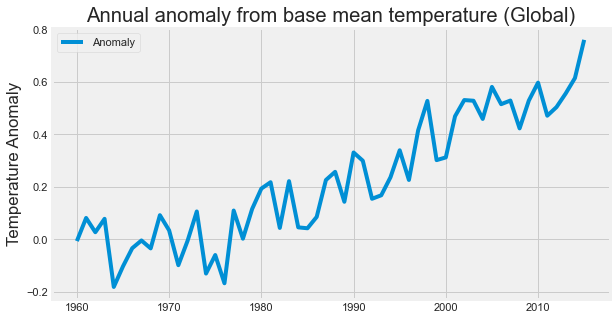

In [11]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_mean_global.loc[1960:2015]["Anomaly"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Annual anomaly from base mean temperature (Global)")
plt.xlabel('')
plt.ylabel('Temperature Anomaly')
plt.show()

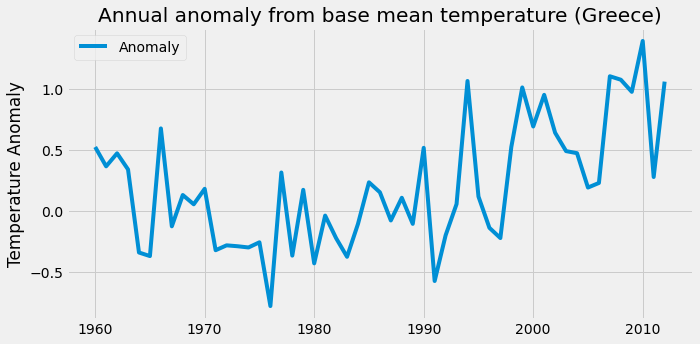

In [6]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_mean_greece.loc[1960:2012]["Anomaly"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Annual anomaly from base mean temperature (Greece)")
plt.xlabel('')
plt.ylabel('Temperature Anomaly')
plt.show()

In [9]:
co2_ppm.columns

Index(['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'], dtype='object')

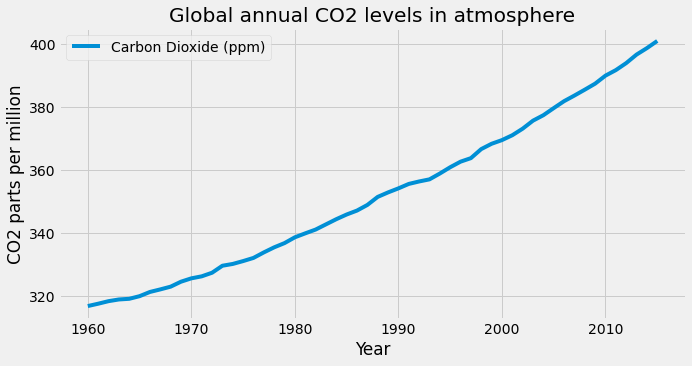

In [12]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_co2_ppm = co2_ppm.groupby(co2_ppm["Year"]).mean()
annual_co2_ppm.loc[1960:2015]["Carbon Dioxide (ppm)"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Global annual CO2 levels in atmosphere")
plt.ylabel("CO2 parts per million")
plt.show()

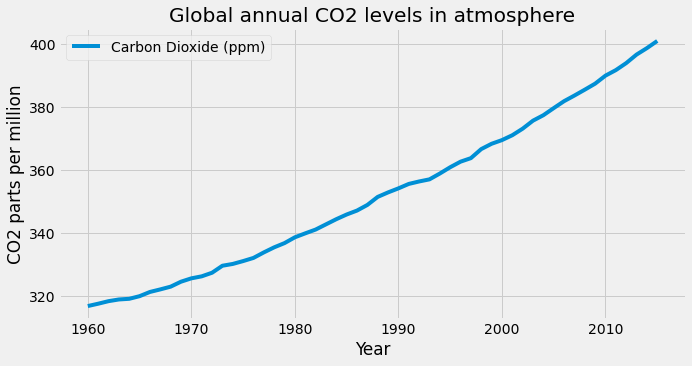

In [13]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_co2_ppm = co2_ppm.groupby(co2_ppm["Year"]).mean()
annual_co2_ppm.loc[1960:2015]["Carbon Dioxide (ppm)"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Global annual CO2 levels in atmosphere")
plt.ylabel("CO2 parts per million")
plt.show()

In [14]:
annual_co2_temp = pd.merge(annual_mean_global.loc[1960:2015], annual_co2_ppm.loc[1960:2015], left_index=True, right_index=True)
annual_co2_temp = annual_co2_temp[["LandAndOceanAverageTemperature", "Anomaly", "Carbon Dioxide (ppm)"]].copy()
annual_co2_temp.corr()

,LandAndOceanAverageTemperature,Anomaly,Carbon Dioxide (ppm)
LandAndOceanAverageTemperature,1.000000,1.000000,0.923603
Anomaly,1.000000,1.000000,0.923603
Carbon Dioxide (ppm),0.923603,0.923603,1.000000


<AxesSubplot:xlabel='Anomaly', ylabel='Carbon Dioxide (ppm)'>

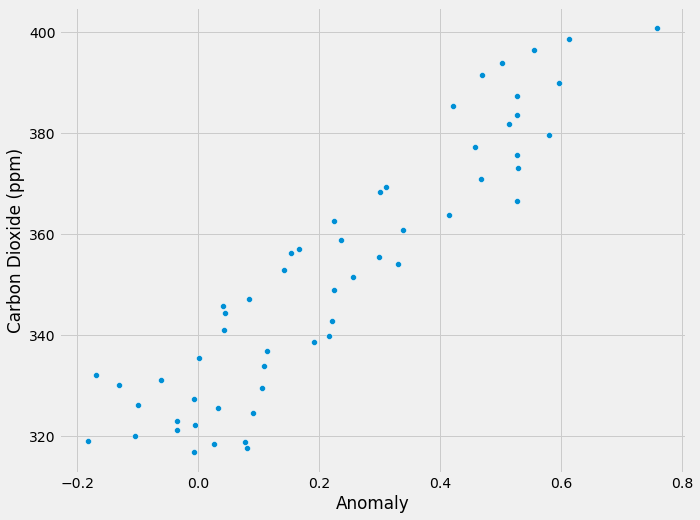

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Anomaly",y="Carbon Dioxide (ppm)", data=annual_co2_temp)

#### K Means ####

In [23]:
mean_value=data_country['AverageTemperature'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
data_country['AverageTemperature'].fillna(value=mean_value, inplace=True)

In [24]:
mean_value=data_country['AverageTemperatureUncertainty'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
data_country['AverageTemperatureUncertainty'].fillna(value=mean_value, inplace=True)

In [19]:
x = data_country.iloc[:,1:3] # 1t for rows and second for columns
x

,AverageTemperature,AverageTemperatureUncertainty
0,4.384000,2.294000
1,17.193354,1.019057
2,17.193354,1.019057
3,17.193354,1.019057
4,17.193354,1.019057
...,...,...
577457,19.059000,1.022000
577458,17.613000,0.473000
577459,17.000000,0.453000
577460,19.759000,0.717000


In [20]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [21]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 0, 0, ..., 0, 0, 0])

Text(0, 0.5, 'WCSS')

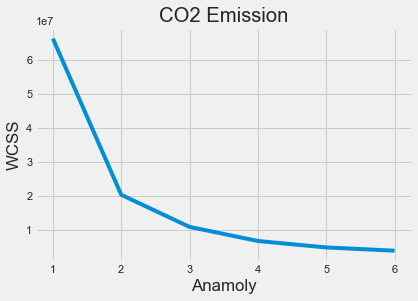

In [27]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('CO2 Emission')
plt.xlabel('Anamoly')
plt.ylabel('WCSS')